In [1]:
# Dalvin Colbert
## D606 MSDADS CAPSTONE
### EBN2 — EBN2 Task 2: Data Analysis Report

In [2]:
# Import appropriate modules
import numpy as np
import pandas as pd
import os
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import statsmodels.api as sm
!pip install mord
from mord import LogisticIT
import matplotlib.pylab as plt
import seaborn as sns
!pip install dmba
from dmba import classificationSummary, gainsChart, liftChart
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import Data set
df = pd.DataFrame(pd.read_csv("C:\\Users\\dalvi\\OneDrive - Western Governors University\\MSDADS\\D606 - CAPSTONE\\Code\\Datasets\\Loan Default Data.csv", na_values='.'))
#df = pd.read_csv("Loan Default Data.csv", na_values='.')
num_rows, num_columns = df.shape

# Describe the general characteristcs of the inital dataset (e.g., rows, columns)
print(f"The dataset contains {num_rows} rows and {num_columns} columns.")

The dataset contains 148670 rows and 34 columns.


In [4]:
# Copy the dataset for integrity
df_copy = df.copy()

In [5]:
# Examine first five rows of dataframe
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,NaN,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [6]:
# Drop static columns
df = df.drop(['ID', 'year'],  axis=1)
df.columns


Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'Neg_ammortization', 'interest_only',
       'lump_sum_payment', 'property_value', 'construction_type',
       'occupancy_type', 'Secured_by', 'total_units', 'income', 'credit_type',
       'Credit_Score', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'LTV', 'Region', 'Security_Type', 'Status',
       'dtir1'],
      dtype='object')

In [7]:
### Variable exploration

# Isolate Categorical Variables
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Prep for categorical variables that can be label encoded
label_variables = ['loan_limit', 'approv_in_adv', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'Secured_by', 'submission_of_application', 'Security_Type']

# Prep for categorical variables that can be one-hot encoded
hot_variables = ['Gender', 'loan_type', 'loan_purpose', 'occupancy_type',  'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'Region']

# Prep for variables for imputation
numeric_variables = ['loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'dtir1']
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

# Isolate target variable
target_variable = 'Status'
target = df['Status']

print(f"The categorical variables are {categorical_columns}")
print(f"The numerical variables are {numerical_columns}")
print(f"The label variables are {label_variables}")
print(f"The hot variables are {hot_variables}")
print(f"The target variable is {target_variable}")




The categorical variables are ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'Region', 'Security_Type']
The numerical variables are ['loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'Status', 'dtir1']
The label variables are ['loan_limit', 'approv_in_adv', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'Secured_by', 'submission_of_application', 'Security_Type']
The hot variables are ['Gender', 'loan_type', 'loan_purpose', 'occupancy_type', 'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'Region']
The targ

In [8]:
# Identify duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate entries: {duplicates}")
print("\n\n")

Number of duplicate entries: 0





In [9]:
# Missing values
total_missing_values = df.isna().sum().sum()
missing_percentage = 100 * total_missing_values / len(df)
print('Total missing values: ', total_missing_values)
print(df.isna().sum())


Total missing values:  181136
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           1
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_application      200
LTV                      

Numerical Variable Exploration

In [10]:
## Numerical Variable nullity
df[numeric_variables].isnull().sum()

loan_amount                 0
rate_of_interest        36439
Interest_rate_spread    36639
Upfront_charges         39642
term                       41
property_value          15098
income                   9150
Credit_Score                0
LTV                     15098
dtir1                   24121
dtype: int64

In [ ]:
# Impute the median over the numeric variablses
df[numeric_variables] = df[numeric_variables].fillna(df[numeric_variables].median())

In [12]:
# Confirm imputation
df[numeric_variables].isnull().sum()

loan_amount             0
rate_of_interest        0
Interest_rate_spread    0
Upfront_charges         0
term                    0
property_value          0
income                  0
Credit_Score            0
LTV                     0
dtir1                   0
dtype: int64

In [13]:
numeric_corr_matrix = df[numeric_variables].corr()
print("Correlation matrix is : ")
print(numeric_corr_matrix)

Correlation matrix is : 
                      loan_amount  rate_of_interest  Interest_rate_spread  \
loan_amount              1.000000         -0.122830             -0.309280   
rate_of_interest        -0.122830          1.000000              0.615149   
Interest_rate_spread    -0.309280          0.615149              1.000000   
Upfront_charges          0.057451         -0.071066              0.035799   
term                     0.174346          0.182857             -0.137148   
property_value           0.686242         -0.102772             -0.286711   
income                   0.440715         -0.014341             -0.099612   
Credit_Score             0.004438         -0.001341             -0.001703   
LTV                      0.036361         -0.002258              0.036361   
dtir1                    0.014935          0.029836              0.049866   

                      Upfront_charges      term  property_value    income  \
loan_amount                  0.057451  0.174346   

In [14]:
# Missing values
total_missing_values = df.isna().sum().sum()
print('Total missing values: ', total_missing_values)
print(df.isna().sum())

Total missing values:  4908
loan_limit                   3344
Gender                          0
approv_in_adv                 908
loan_type                       0
loan_purpose                  134
Credit_Worthiness               0
open_credit                     0
business_or_commercial          1
loan_amount                     0
rate_of_interest                0
Interest_rate_spread            0
Upfront_charges                 0
term                            0
Neg_ammortization             121
interest_only                   0
lump_sum_payment                0
property_value                  0
construction_type               0
occupancy_type                  0
Secured_by                      0
total_units                     0
income                          0
credit_type                     0
Credit_Score                    0
co-applicant_credit_type        0
age                           200
submission_of_application     200
LTV                             0
Region              

In [ ]:
df = df.replace("NA", np.nan)


In [16]:
# Drop remaining (4908 / 140K is a very small and acceptable drop)
df.dropna(inplace=True)

In [17]:
# Missing values
total_missing_values = df.isna().sum().sum()
missing_percentage = 100 * total_missing_values / len(df)
print('Total missing values: ', total_missing_values)
print(df.isna().sum())

Total missing values:  0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status                       0
dtir1         

In [18]:
# Label Encode Variables
label_encoder = preprocessing.LabelEncoder()
for label in label_variables:
    df[label] = label_encoder.fit_transform(df[label])
    print(df[label].unique())
    print(df[label].value_counts())



[0 1]
loan_limit
0    134223
1      9759
Name: count, dtype: int64
[0 1]
approv_in_adv
0    121038
1     22944
Name: count, dtype: int64
[0 1]
Credit_Worthiness
0    137670
1      6312
Name: count, dtype: int64
[0 1]
open_credit
0    143443
1       539
Name: count, dtype: int64
[1 0]
business_or_commercial
1    124067
0     19915
Name: count, dtype: int64
[1 0]
Neg_ammortization
1    129597
0     14385
Name: count, dtype: int64
[1 0]
interest_only
1    137156
0      6826
Name: count, dtype: int64
[1 0]
lump_sum_payment
1    140598
0      3384
Name: count, dtype: int64
[1 0]
construction_type
1    143949
0        33
Name: count, dtype: int64
[0 1]
Secured_by
0    143949
1        33
Name: count, dtype: int64
[1 0]
submission_of_application
1    92913
0    51069
Name: count, dtype: int64
[1 0]
Security_Type
1    143949
0        33
Name: count, dtype: int64


In [19]:
#hot_variables = ['Gender', 'loan_type', 'loan_purpose', 'occupancy_type',  'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'Region']
df_encoded = pd.get_dummies(df, columns=hot_variables, dtype=int)


In [20]:
# Varify cleaned and encoded dataset
df_encoded.head()

,loan_limit,approv_in_adv,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,...,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74,Region_North,Region_North-East,Region_central,Region_south
0,0,0,0,0,1,116500,3.99,0.3904,2596.45,360.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,206500,3.99,0.3904,2596.45,360.0,...,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0,1,456500,4.25,0.6810,2596.45,360.0,...,0,1,0,0,0,0,1,0,0,0
4,0,1,0,0,1,696500,4.00,0.3042,0.00,360.0,...,0,0,0,0,0,0,1,0,0,0
5,0,1,0,0,1,706500,3.99,0.1523,370.00,360.0,...,1,0,0,0,0,0,1,0,0,0


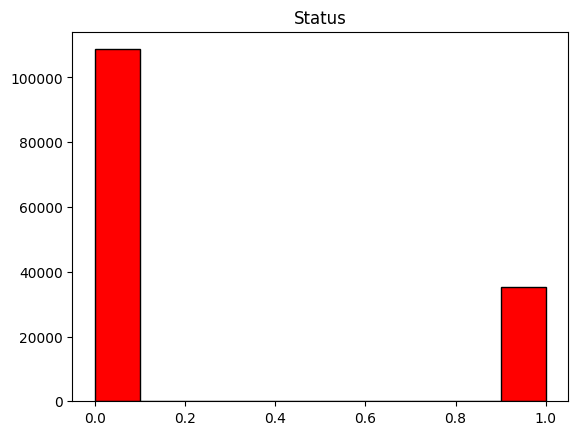

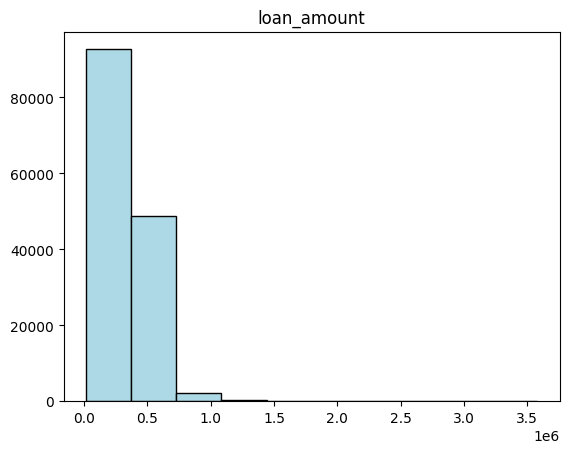

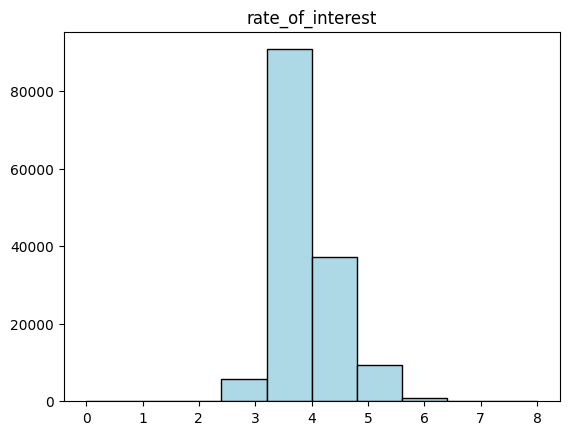

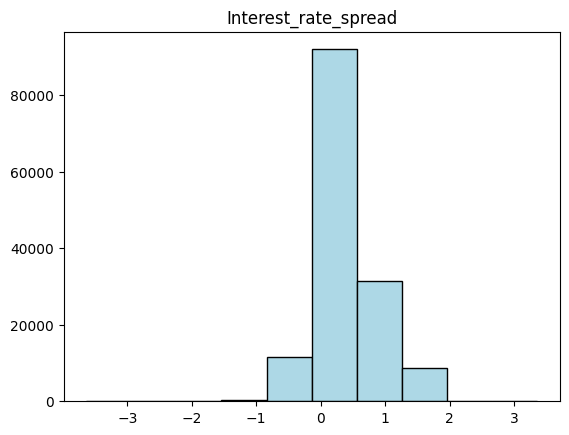

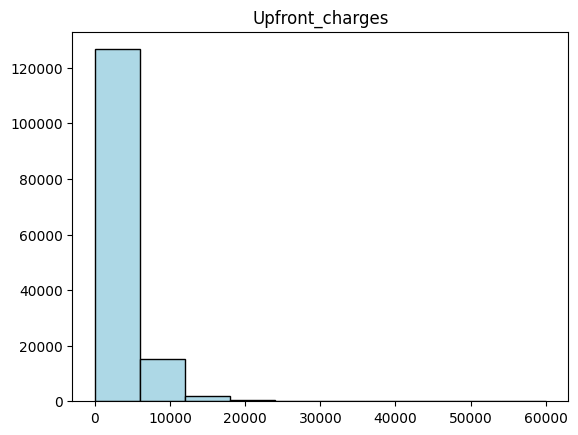

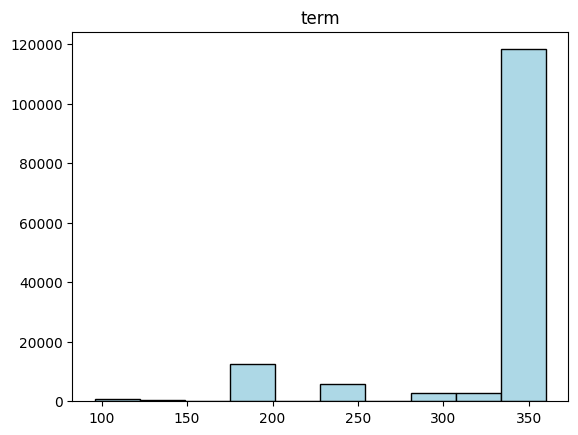

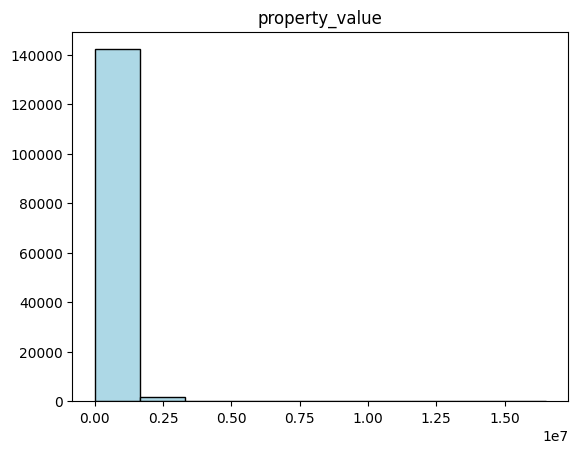

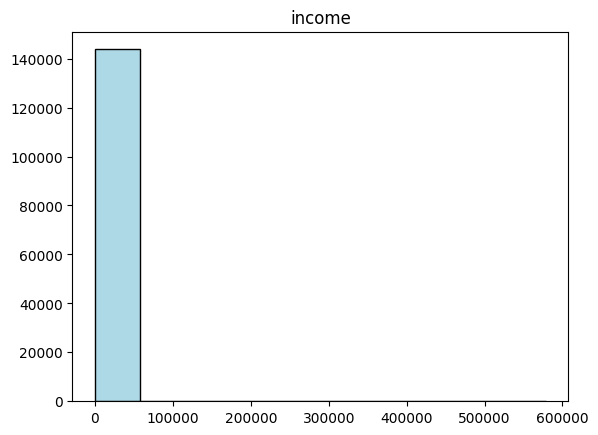

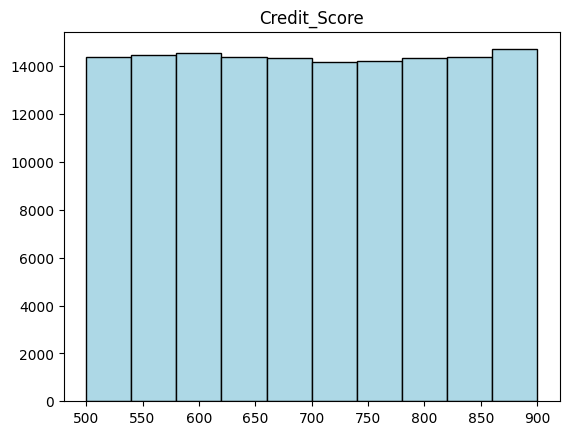

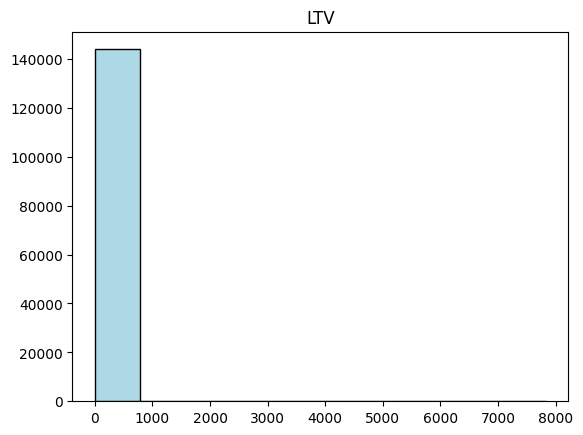

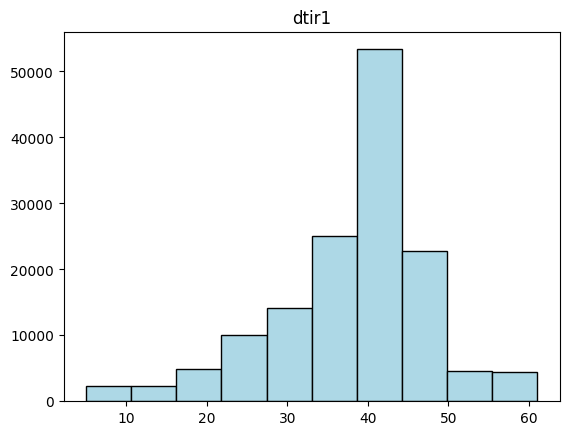

In [21]:
# Univariate Visualization
loan_amount = df['loan_amount']
rate_of_interest = df['rate_of_interest']
interest_spread = df['Interest_rate_spread']
upfront_charges = df['Upfront_charges']
term = df['term']
property_value = df['property_value']
income = df['income']
credit_score = df['Credit_Score']
LTV = df['LTV']
DTI = df['dtir1']
status = df['Status']

df.hist(column=['Status'], grid=False, color='red',edgecolor='black')
plt.savefig('status.png', dpi=300)

df.hist(column=['loan_amount'], grid=False, color='lightblue',edgecolor='black')
plt.savefig('loanAmount.png', dpi=300)

df.hist(column=['rate_of_interest'], grid=False, color='lightblue',edgecolor='black')
plt.savefig('InterestRate.png', dpi=300)

df.hist(column=['Interest_rate_spread'], grid=False, color='lightblue',edgecolor='black')
plt.savefig('Interestspread.png', dpi=300)

df.hist(column=['Upfront_charges'], grid=False, color='lightblue',edgecolor='black')
plt.savefig('Upfront_charges.png', dpi=300)

df.hist(column=['term'], grid=False, color='lightblue',edgecolor='black')
plt.savefig('term.png', dpi=300)

df.hist(column=['property_value'], grid=False, color='lightblue',edgecolor='black')
plt.savefig('property_value.png', dpi=300)

df.hist(column=['income'], grid=False, color='lightblue',edgecolor='black')
plt.savefig('income.png', dpi=300)

df.hist(column=['Credit_Score'], grid=False, color='lightblue',edgecolor='black')
plt.savefig('creditscore.png', dpi=300)

df.hist(column=['LTV'], grid=False, color='lightblue',edgecolor='black')
plt.savefig('LTV.png', dpi=300)

df.hist(column=['dtir1'], grid=False, color='lightblue',edgecolor='black')
plt.savefig('dtir1.png', dpi=300)

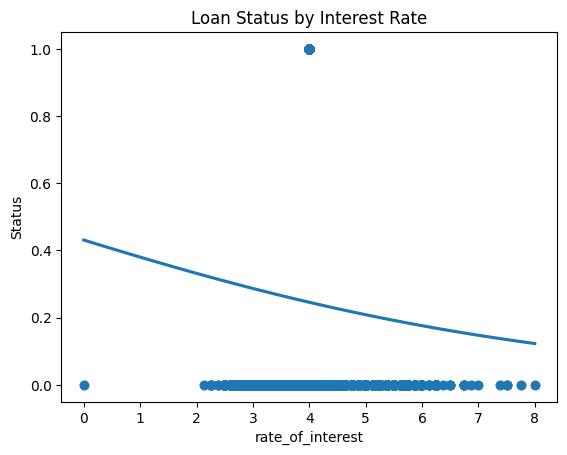

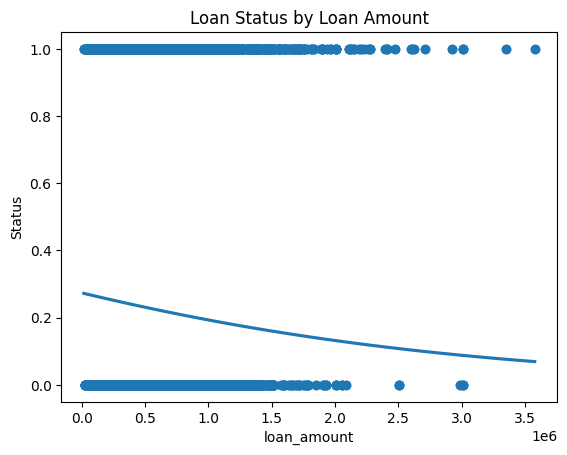

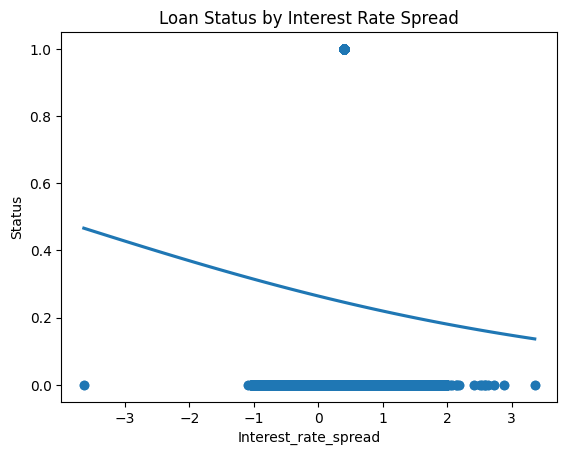

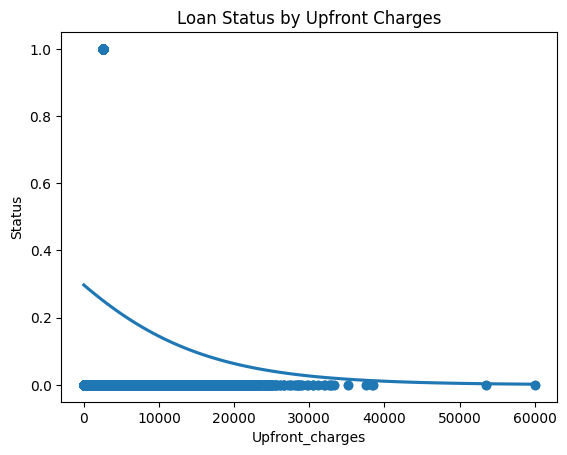

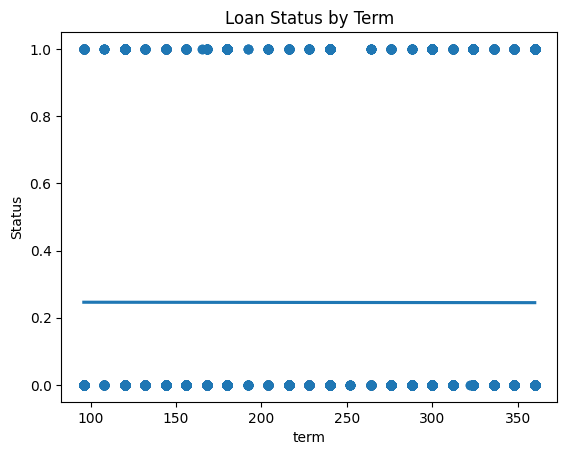

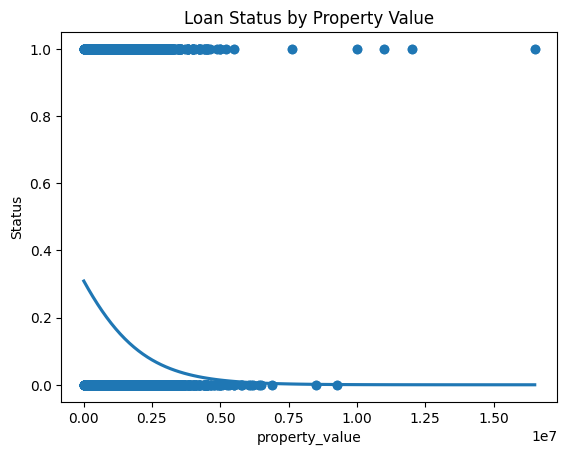

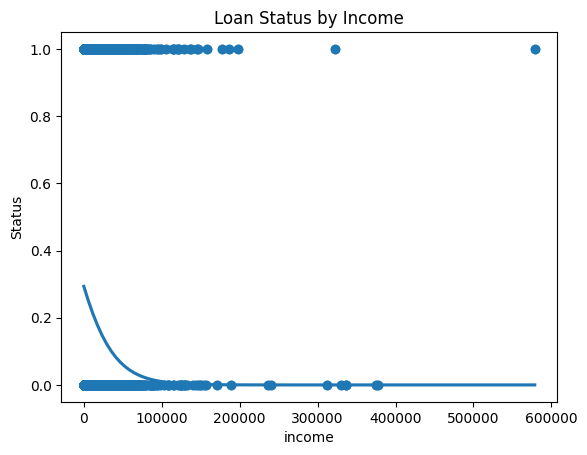

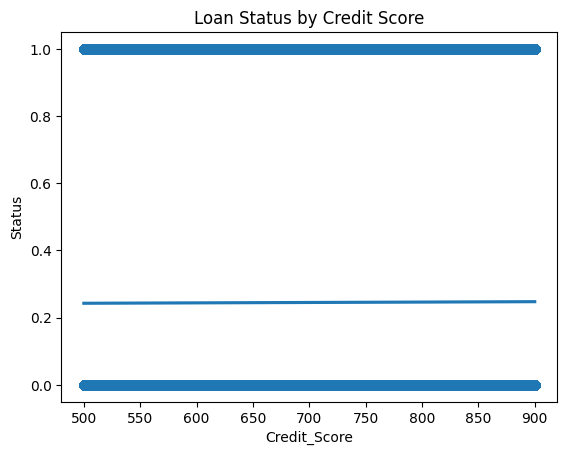

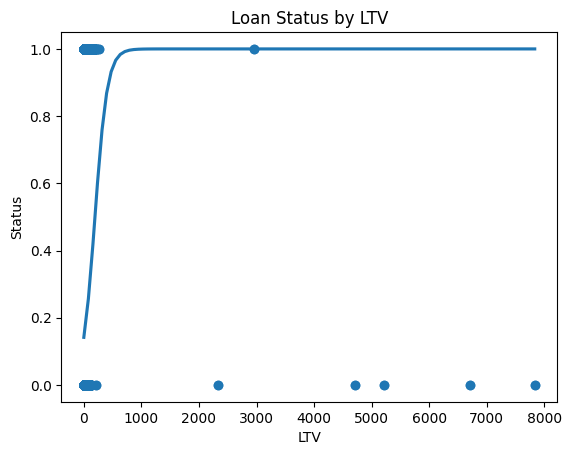

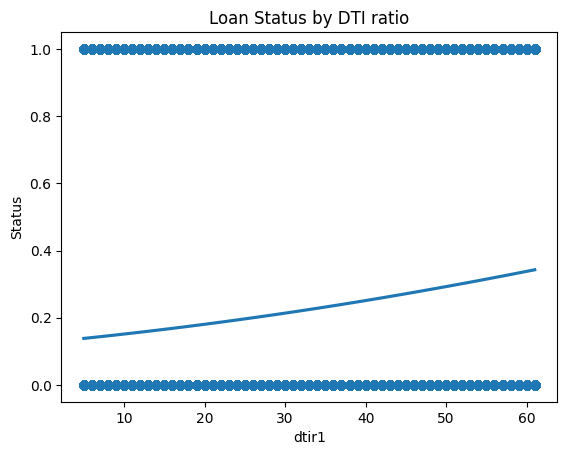

<Figure size 640x480 with 0 Axes>

In [22]:
### Bivariate Visualization

## Interest Rate vs Loan Status
plt.scatter(rate_of_interest, status)
plt.title("Loan Status by Interest Rate")
plt.xlabel('Interest Rate')
plt.ylabel('Loan Status')
sns.regplot(x=rate_of_interest, y=status, data=df, logistic=True, ci=None)
plt.show()
plt.savefig('InterestRate_Status.png', dpi=300)

## Loan Amount vs Loan Status
plt.scatter(loan_amount, status)
plt.title("Loan Status by Loan Amount")
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
sns.regplot(x=loan_amount, y=status, data=df, logistic=True, ci=None)
plt.show()
plt.savefig('LoanAmount_Status.png', dpi=300)

## Interest Spread vs Loan Status
plt.scatter(interest_spread, status)
plt.title("Loan Status by Interest Rate Spread")
plt.xlabel('Interest Rate Spread')
plt.ylabel('Loan Status')
sns.regplot(x=interest_spread, y=status, data=df, logistic=True, ci=None)
plt.show()
plt.savefig('InterestRateSpread_Status.png', dpi=300)

## Upfront Charges vs Loan Status
plt.scatter(upfront_charges, status)
plt.title("Loan Status by Upfront Charges")
plt.xlabel('Upfront Charges')
plt.ylabel('Loan Status')
sns.regplot(x=upfront_charges, y=status, data=df, logistic=True, ci=None)
plt.show()
plt.savefig('UpfrontCharges_Status.png', dpi=300)

## Term vs Loan Status
plt.scatter(term, status)
plt.title("Loan Status by Term")
plt.xlabel('Term')
plt.ylabel('Loan Status')
sns.regplot(x=term, y=status, data=df, logistic=True, ci=None)
plt.show()
plt.savefig('Term_Status.png', dpi=300)

## Property Value vs Loan Status
plt.scatter(property_value, status)
plt.title("Loan Status by Property Value")
plt.xlabel('Property Value')
plt.ylabel('Loan Status')
sns.regplot(x=property_value, y=status, data=df, logistic=True, ci=None)
plt.show()
plt.savefig('PropertyValue_Status.png', dpi=300)

## Income vs Loan Status
plt.scatter(income, status)
plt.title("Loan Status by Income")
plt.xlabel('Income')
plt.ylabel('Loan Status')
sns.regplot(x=income, y=status, data=df, logistic=True, ci=None)
plt.show()
plt.savefig('Income_Status.png', dpi=300)

## Credit Score vs Loan Status
plt.scatter(credit_score, status)
plt.title("Loan Status by Credit Score")
plt.xlabel('Credit Score')
plt.ylabel('Loan Status')
sns.regplot(x=credit_score, y=status, data=df, logistic=True, ci=None)
plt.show()
plt.savefig('CreditScore_Status.png', dpi=300)

## LTV vs Loan Status
plt.scatter(LTV, status)
plt.title("Loan Status by LTV")
plt.xlabel('Loan-to-Value (LTV)')
plt.ylabel('Loan Status')
sns.regplot(x=LTV, y=status, data=df, logistic=True, ci=None)
plt.show()
plt.savefig('LTV_Status.png', dpi=300)

## dtir1 vs Loan Status
plt.scatter(DTI, status)
plt.title("Loan Status by DTI ratio")
plt.xlabel('DTI')
plt.ylabel('Loan Status')
sns.regplot(x=DTI, y=status, data=df, logistic=True, ci=None)
plt.show()
plt.savefig('DTI_Status.png', dpi=300)




In [23]:
# Scale and Standardize the dataset
X = df_encoded.drop(columns=['Status'])
y = df_encoded['Status']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
X_scaled

array([[-0.26964302, -0.43538524, -0.21412326, ..., -0.09194488,
        -0.24903371,  1.15088656],
       [-0.26964302, -0.43538524, -0.21412326, ..., -0.09194488,
        -0.24903371, -0.86889537],
       [-0.26964302, -0.43538524, -0.21412326, ..., -0.09194488,
        -0.24903371, -0.86889537],
       ...,
       [-0.26964302, -0.43538524, -0.21412326, ..., -0.09194488,
        -0.24903371, -0.86889537],
       [-0.26964302, -0.43538524, -0.21412326, ..., -0.09194488,
        -0.24903371, -0.86889537],
       [-0.26964302, -0.43538524, -0.21412326, ..., -0.09194488,
        -0.24903371, -0.86889537]])

In [25]:
## Assumption Exploration
print("Logistic Regression Assumption Check")
# Stats is Binary
binary = [0,1]
result_list = []
result = ~status.isin(binary)
for result in result:
    if result == True:
        result_list.append(result[0])
    else:
        None
if result_list == []:
    print("1. Status is a binary variable of 0's and 1's")


# Sample Size Rule of Thumb
# 10 cases with the least frquent outcome per explanatory variable (34 explanatory variables)
# Generously give probability of 0.2
sample_size = df.shape[0]
assumption_size = (10 * 34)/ (0.2)

if assumption_size < sample_size:
    print(f"2. The sample size of {sample_size} is sufficient as it is greater than the assumed necessary size of {assumption_size}")
else:
    print(f"2. The sample size of {sample_size} is not sufficient as it is less than the assumed necessary size of {assumption_size}")


Logistic Regression Assumption Check
1. Status is a binary variable of 0's and 1's
2. The sample size of 143982 is sufficient as it is greater than the assumed necessary size of 1700.0


### PCA

In [26]:
### slice dataset and extract variables
df_PCA = pd.concat([y, X], axis=1)
df_PCA

,Status,loan_limit,approv_in_adv,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,...,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74,Region_North,Region_North-East,Region_central,Region_south
0,1,0,0,0,0,1,116500,3.990,0.3904,2596.45,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,206500,3.990,0.3904,2596.45,...,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0,0,1,456500,4.250,0.6810,2596.45,...,0,1,0,0,0,0,1,0,0,0
4,0,0,1,0,0,1,696500,4.000,0.3042,0.00,...,0,0,0,0,0,0,1,0,0,0
5,0,0,1,0,0,1,706500,3.990,0.1523,370.00,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,0,0,0,0,0,1,436500,3.125,0.2571,9960.00,...,0,0,1,0,0,0,0,0,0,1
148666,0,0,0,0,0,1,586500,5.190,0.8544,0.00,...,0,0,0,0,0,0,0,0,0,1
148667,0,0,0,0,0,1,446500,3.125,0.0816,1226.64,...,0,1,0,0,0,0,1,0,0,0
148668,0,0,0,0,0,1,196500,3.500,0.5824,4323.33,...,0,0,1,0,0,0,1,0,0,0


In [27]:
## Consider 4 components
from sklearn.decomposition import PCA

PCA = PCA(n_components=4)
PCA_4 = PCA.fit(df_PCA)
x = PCA.transform(df_PCA)

In [28]:
## create dataframe
pca4_df = pd.DataFrame(data=x, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca4_df

# Check dimensions of data after PCA
print(f"Principal Component Matrix Dimensions: {x.shape}")
print("")
print("Principal Component Matrix")
print(pca4_df)

Principal Component Matrix Dimensions: (143982, 4)

Principal Component Matrix
                  PC1            PC2          PC3          PC4
0      -427656.530977  -52564.078020 -1598.058445  -263.237879
1      -116306.905533  -86771.422484  -273.462948  -371.111985
2       202269.996998   49775.537488  3081.089194  -575.309342
3       387988.731633  231681.695898 -1371.028157 -3349.220712
4       622058.054880  143306.226303 -2592.095654 -3026.569604
...               ...            ...          ...          ...
143977  148405.152597   50845.457526  -565.051475  6808.661288
143978  372656.749267  118671.907843 -3516.655800 -3281.429317
143979  262778.498831   13200.349319 -1994.190295 -1951.145791
143980 -249088.045303  -41312.801437  2417.981380  1386.045648
143981   90657.598172   42734.428358  -674.980945  2876.597861

[143982 rows x 4 columns]


Text(0, 0.5, 'PC4')

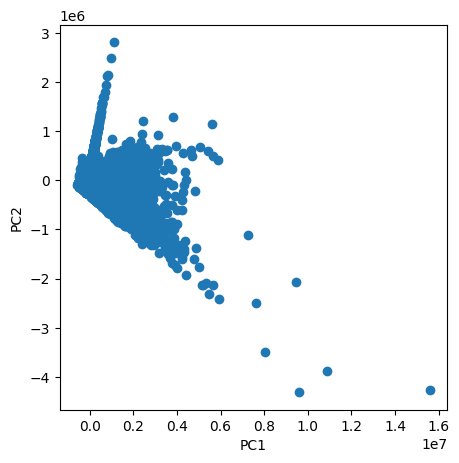

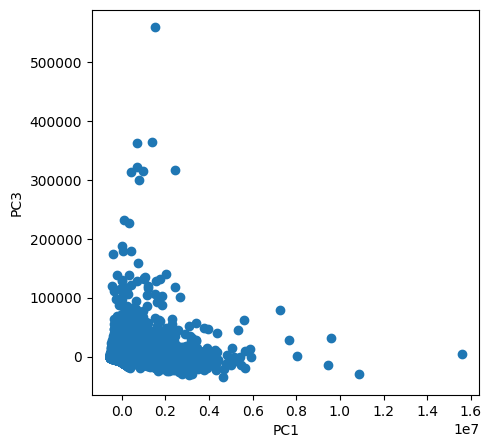

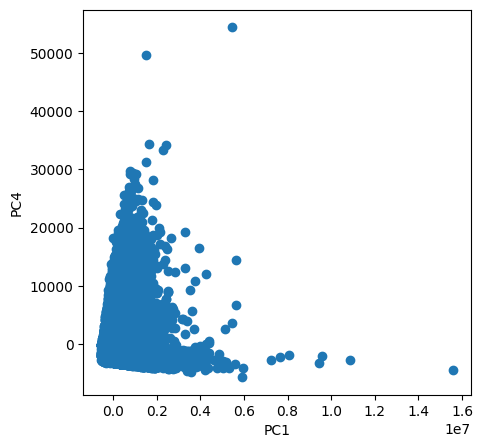

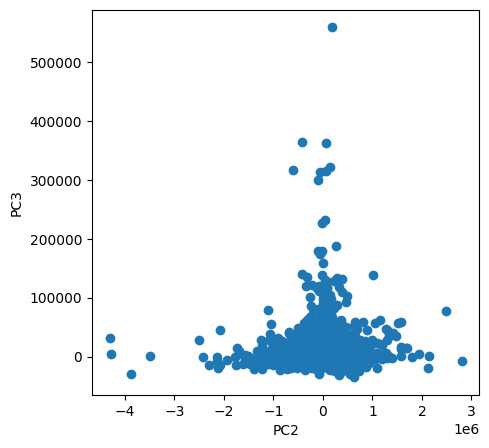

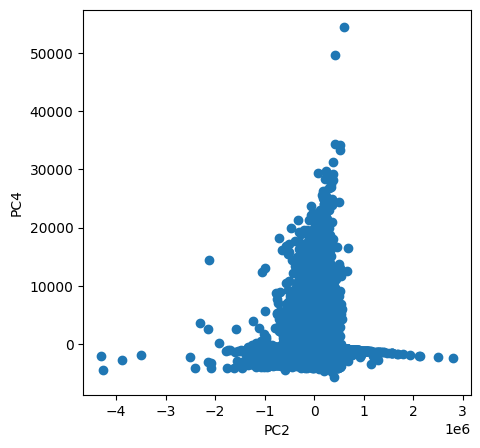

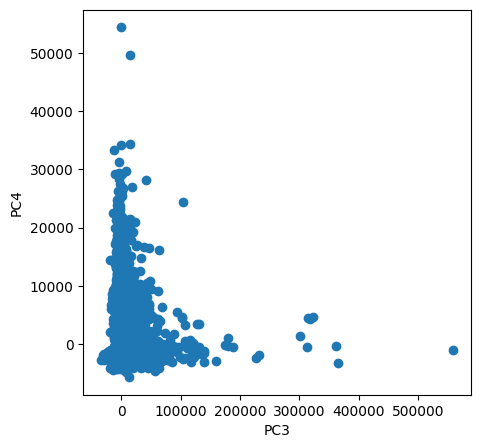

In [29]:
# Plot the components
#from sklearn.decomposition import PCA

plt.figure(figsize=(5,5))
plt.scatter(x[:,0], x[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.figure(figsize=(5,5))
plt.scatter(x[:,0], x[:,2])
plt.xlabel('PC1')
plt.ylabel('PC3')

plt.figure(figsize=(5,5))
plt.scatter(x[:,0], x[:,3])
plt.xlabel('PC1')
plt.ylabel('PC4')

plt.figure(figsize=(5,5))
plt.scatter(x[:,1], x[:,2])
plt.xlabel('PC2')
plt.ylabel('PC3')

plt.figure(figsize=(5,5))
plt.scatter(x[:,1], x[:,3])
plt.xlabel('PC2')
plt.ylabel('PC4')

plt.figure(figsize=(5,5))
plt.scatter(x[:,2], x[:,3])
plt.xlabel('PC3')
plt.ylabel('PC4')


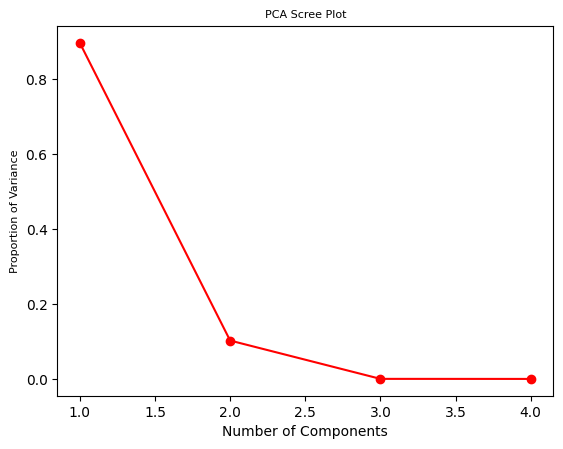

In [30]:
# Component Analysis
# Use Elbow Rule
prop_var = PCA.explained_variance_ratio_
eigenvalues = PCA.explained_variance_

PC_numbers = np.arange(PCA.n_components_) + 1

plt.plot(PC_numbers, prop_var, 'ro-')
plt.title('PCA Scree Plot', fontsize=8)
plt.xlabel('Number of Components')
plt.ylabel('Proportion of Variance', fontsize=8)
plt.show()

# Based on Elbow Rule, keep 2 components

In [31]:
### Principal Component Analysis
from sklearn.decomposition import PCA

## Consider 2 components
pca = PCA(n_components=2)

# pca.fit(scaled_data)
x_two_comp = pca.fit_transform(X_scaled)

## create dataframe
pca2_df = pd.DataFrame(data=x_two_comp, columns=['PC1', 'PC2'])
pca2_df

# Check dimensions of data after PCA
print(f"Principal Component Matrix Dimensions: {pca2_df.shape}\n")
print("Principal Component Matrix")
print(pca2_df)

Principal Component Matrix Dimensions: (143982, 2)

Principal Component Matrix
             PC1       PC2
0      -1.827893  0.930594
1      -1.997920 -3.286194
2       0.835479  0.129208
3       2.924049 -1.922175
4       3.299063 -1.804429
...          ...       ...
143977  0.263181  1.584011
143978  2.540422  5.544932
143979  2.190807 -0.945266
143980  0.322260  0.045196
143981 -0.709778  1.357732

[143982 rows x 2 columns]


[[ 1.73039235e-01 -3.15138210e-02]
 [-6.13133116e-02  8.07961634e-03]
 [-1.78393288e-02  4.44954240e-02]
 [ 1.33587206e-02  9.04344918e-02]
 [ 5.75323424e-01  5.03541486e-01]
 [ 6.45899401e-01 -1.23107953e-01]
 [-1.88937544e-01  3.30552037e-01]
 [-4.93443917e-01  1.90637404e-01]
 [-2.17325351e-03  2.63993949e-01]
 [ 2.32285772e-02 -1.92442105e-01]
 [ 4.25808060e-02 -4.29948997e-02]
 [-3.20703026e-02 -8.79805077e-03]
 [-6.01659145e-04  3.94557358e-02]
 [ 6.06911607e-01  6.96049901e-02]
 [ 5.07991300e-02  2.99009521e-01]
 [-5.07991300e-02 -2.99009521e-01]
 [ 5.06541852e-01  9.20527889e-02]
 [ 3.89776810e-03  6.34321630e-05]
 [-5.01505662e-01  2.38864100e-01]
 [-1.21772974e-01 -2.47720571e-01]
 [ 5.07991300e-02  2.99009521e-01]
 [-2.10311413e-01 -1.44528597e-01]
 [-1.88605068e-01  6.82510655e-02]
 [ 5.15171415e-01 -4.03188312e-01]
 [-1.14198718e-01  1.88463894e-02]
 [-2.45276512e-01  3.35873790e-01]
 [ 4.74883553e-01  6.01973993e-01]
 [-5.75323424e-01 -5.03541486e-01]
 [-1.21992764e-02 -2

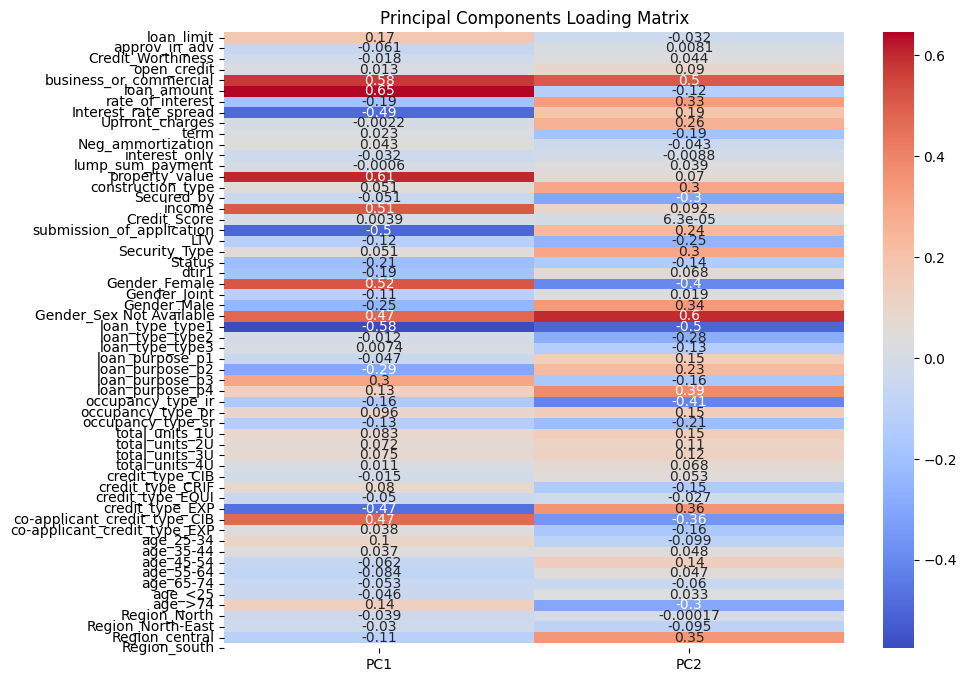

In [32]:
# Extract loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
print(loadings)

# Plot heatmap of loadings
plt.figure(figsize=(10, 8))
sns.heatmap(loadings, annot=True, cmap='coolwarm', yticklabels=df_encoded.columns, xticklabels=['PC1', 'PC2'])
plt.title('Principal Components Loading Matrix')
plt.show()

In [33]:
# PCA variance analysis
print(f"The eigenvalue of PC1 is: {pca.explained_variance_[0]}")
print(f"The eigenvalue of PC2 is: {pca.explained_variance_[1]}")
print(f"Explained variability per component: {pca.explained_variance_ratio_}")

The eigenvalue of PC1 is: 3.720936493466061
The eigenvalue of PC2 is: 3.049076310071449
Explained variability per component: [0.06527913 0.0534922 ]


In [34]:
top5 = ['business_or_commercial', 'loan_amount', 'property_value', 'income', 'Gender_Female']

### Regression Analysis

In [35]:
# Train
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=2)

#Fit and transform the training data
X_train_scaled = scaler.fit_transform(train_X)

# Transform the test data
valid_X_scaled = scaler.transform(valid_X)


In [36]:
#### Regression Analysis 
### Fitting the Regression Model

# Partition data (60/40 split)
X_variables = df_encoded[top5]
y = df_encoded['Status']
X_train_X, X_valid_X, y_train_y, y_valid_y = train_test_split(X_variables, y, test_size=0.2, random_state=2)

## Scale Features


#Fit and transform the training data 
X_train_X_scaled = scaler.fit_transform(X_train_X)

# Transform the test data 
X_valid_X_scaled = scaler.transform(X_valid_X)

# fit a logistic regression (set penalty=12 and C=1e42 to avoid regularization)
model = LogisticRegression()
model.fit(X_train_X_scaled, y_train_y)
print("Model")
print('Intercept', model.intercept_)
print('Coefficients', model.coef_)

print('intercept', model.intercept_[0])
print(pd.DataFrame({'coeff': model.coef_[0]}, index=X_variables.columns).transpose())

print('AIC', AIC_score(y_valid_y, model.predict(X_valid_X), df = len(X_train_X.columns) + 1))

Model
Intercept [-1.15277414]
Coefficients [[-0.14196953  0.21502694 -0.30666952 -0.19769203 -0.0018163 ]]
intercept -1.1527741447450817
       business_or_commercial  loan_amount  property_value    income  \
coeff                -0.14197     0.215027        -0.30667 -0.197692   

       Gender_Female  
coeff      -0.001816  
AIC 40083.166648140104


In [37]:
# Prediction Values
train_y_pred = model.predict(X_train_X_scaled)
test_y_pred = model.predict(X_valid_X_scaled)


In [38]:
# Calculate accuracy
train_accuracy = accuracy_score(y_train_y, train_y_pred)
test_accuracy = accuracy_score(y_valid_y, test_y_pred)

# Calculate classification reports
train_class_report = classification_report(y_train_y, train_y_pred)
test_class_report = classification_report(y_valid_y, test_y_pred)

# Train Reports
print('Training Accuracy:', train_accuracy)
print('Training Classification Report:\n', train_class_report)
print("\n")

# Test Reports
print('Testing Accuracy:', test_accuracy)
print('Testing Classification Report:\n', test_class_report)


Training Accuracy: 0.7547857793983591
Training Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86     86928
           1       0.93      0.00      0.00     28257

    accuracy                           0.75    115185
   macro avg       0.84      0.50      0.43    115185
weighted avg       0.80      0.75      0.65    115185



Testing Accuracy: 0.756502413445845
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86     21784
           1       1.00      0.00      0.00      7013

    accuracy                           0.76     28797
   macro avg       0.88      0.50      0.43     28797
weighted avg       0.82      0.76      0.65     28797



In [39]:
print("End of analysis")
print("Dalvin Colbert")
print("D606 - Data Science Capstone")

End of analysis
Dalvin Colbert
D606 - Data Science Capstone
